# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Matthew Nathan Limahardja
- **Email:** nathanlimahardja@gmail.com
- **ID Dicoding:** nathan_limahardja

## Menentukan Pertanyaan Bisnis
- Bagaimana keadaan lingkungan terhadap situasi weather?
- Bagaimana performa user setiap tahunnya?

## Import Semua Packages/Library yang Digunakan

In [73]:
import pandas as pd

## Data Wrangling
### Gathering Data

In [74]:
day_df = pd.read_csv('data/day.csv')
day_df.sample(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
290,291,2011-10-18,4,0,10,0,2,1,2,0.532500,0.522721,0.701667,0.110087,637,4111,4748
24,25,2011-01-25,1,0,1,0,2,1,2,0.223478,0.234526,0.616957,0.129796,186,1799,1985
224,225,2011-08-13,3,0,8,0,6,0,2,0.685833,0.645858,0.729583,0.211454,1504,2646,4150
429,430,2012-03-05,1,1,3,0,1,1,1,0.243333,0.241171,0.506250,0.228858,203,3130,3333
332,333,2011-11-29,4,0,11,0,2,1,2,0.458333,0.451375,0.830833,0.258092,96,2818,2914
29,30,2011-01-30,1,0,1,0,0,0,1,0.216522,0.250322,0.722174,0.073983,140,956,1096
559,560,2012-07-13,3,1,7,0,5,1,2,0.731667,0.667933,0.485833,0.080850,1511,5988,7499
598,599,2012-08-21,3,1,8,0,2,1,1,0.649167,0.601025,0.673750,0.072771,1081,5925,7006
323,324,2011-11-20,4,0,11,0,0,0,2,0.463333,0.457058,0.684583,0.185950,787,2733,3520
71,72,2011-03-13,1,0,3,0,0,0,1,0.384348,0.380091,0.527391,0.270604,982,1435,2417


### Assessing Data

In [75]:
day_df.info()
print("Jumlah duplikasi: ", day_df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
Jumlah duplikasi:  0


### Cleaning Data

In [76]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

**Insight:**
- Tidak ada duplicate, missing values
- Data type masing masing kolom sudah benar kecuali dteday

## Exploratory Data Analysis (EDA)

### Explore `day_df`

In [77]:
day_df.describe(include='all')

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [78]:
day_by_weathersit = day_df.groupby(['weathersit']).agg({
    'temp': 'mean',
    'atemp': 'mean',
    'hum': 'mean',
    'windspeed': 'mean'
}).reset_index()
day_by_weathersit['weathersit'] = day_by_weathersit['weathersit'].map({
    1: "Clear",
    2: "Mist",
    3: "Snow/Rain",
    4: "Storm"
})
print(day_by_weathersit)

  weathersit      temp     atemp       hum  windspeed
0      Clear  0.511541  0.488596  0.565594   0.190253
1       Mist  0.470366  0.452868  0.725887   0.186431
2  Snow/Rain  0.433440  0.413064  0.848872   0.243336


In [86]:
day_by_year = day_df.groupby(['yr', 'season']).agg({
    'casual': 'sum',
    'registered': 'sum',
    'cnt': 'sum',
}).reset_index()
day_by_year['yr'] += 1
day_by_year['season'] = day_by_year['season'].map({
    1: 'springer', 
    2: 'summer',
    3: 'fall',
    4: 'winter'
})
print(day_by_year)

   yr    season  casual  registered     cnt
0   1  springer   21425      128575  150000
1   1    summer   77564      269752  347316
2   1      fall   95450      324200  419650
3   1    winter   52813      273324  326137
4   2  springer   39197      282151  321348
5   2    summer  125958      445315  571273
6   2      fall  130641      510838  641479
7   2    winter   76969      438507  515476


**Insight:**
- Temperatur tinggi pada cuaca yang cerah
- Humidity dan kecepatan angin cenderung tinggi pada situasi hujan atau bersalju
- Terjadi peningkatan user pada tahun berikutnya baik yang casual dan registered
- Season 3 yaitu fall selalu populer oleh user dalam kedua tahunnya

## Visualization

### Pertanyaan 1: Bagaimana keadaan lingkungan terhadap situasi weather?

<Axes: xlabel='weathersit'>

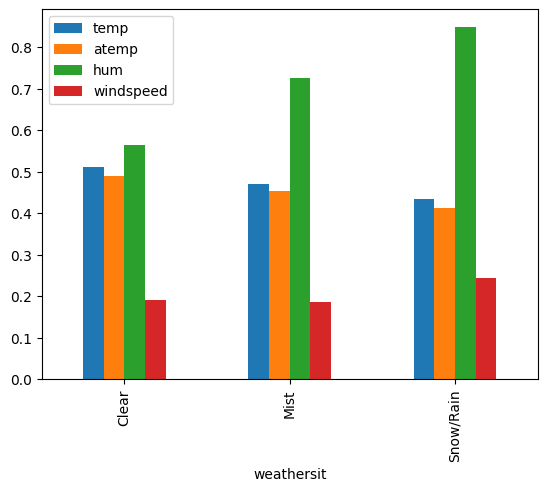

In [80]:
day_by_weathersit.plot(kind='bar', x='weathersit', y=['temp', 'atemp', 'hum', 'windspeed'])

### Pertanyaan 2: Bagaimana performa user setiap tahunnya?

<Axes: xlabel='season'>

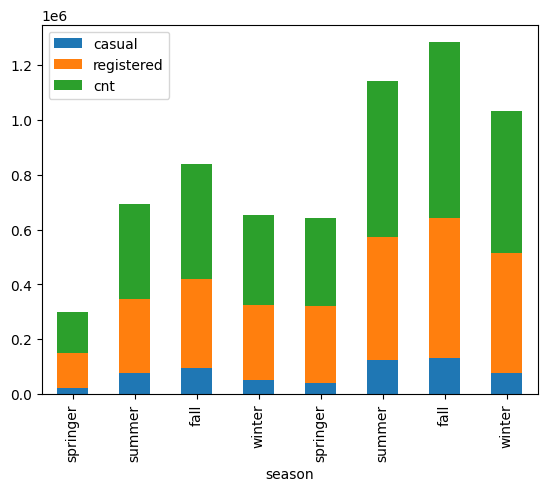

In [87]:
day_by_year.plot(kind='bar', x='season', y=['casual', 'registered', 'cnt'], stacked=True)

**Insight:**
- Lebih banyak user yang bertipe registered
- Humidity berbeda jauh pada setiap kondisi weather
- Omset penjulan melonjak pada season 3 dan terus naik setiap tahunnya

## Conclusion
- Humidity sangat mempengaruhi situasi weather
- Di tahun berikutnya, performa user meningkat pesat
- Fokus dan bersiap pada season 3 yaitu fall pada setiap tahunnya karna penjualan meningkat pesat
- Springer adalah season terendah performanya pada setiap tahun